# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** Deep Learning (MDM)


**Lab Title:** Yolo11 -Model-Application Name(Custom Dataset should be Different for each group)

**Student Name:**Vedant Puri

**Student ID:**202302040011

**Date of Submission:** 4/1/2025

**Group Members**: Raviraj tekale, Ajay ingle


**Objective**
The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.




**Task 1: Environment Setup and YOLOv11 Installation**

Objective: Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**

1. Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.).
2. Install YOLOv11 from the official repository.
3. Verify the installation by running a sample script.
4. **Expected Outcome:** A functional YOLOv11 environment ready for experimentation.


In [ ]:
import shap
import lime
import lime.lime_tabular
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

**Task 2: Dataset Preparation & Preprocessing**
Objective: Load and preprocess a dataset for object detection.

Instructions:

1. Choose a Dataset – Use COCO, Pascal VOC, or a custom dataset.
2. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg.
3. Convert Annotations – Use Roboflow to export the dataset in YOLO format.
4. Download the Dataset – Use the Roboflow API to fetch the dataset.
5. Split the Dataset – Divide into train (80%), validation (10%), and test (10%).
5. **Expected Outcome:** A well-structured dataset in YOLO format.




In [ ]:
import shap
import lime
import lime.lime_tabular
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
#Dataset Name: Breast Cancer Wisconsin (Diagnostic)
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.targe


**Task 3: Training YOLOv11 Model**
Objective: Train YOLOv11 on the prepared dataset.

Instructions:

1. Configure the training parameters (batch size, epochs, learning rate).
2. Train the YOLOv11 model using the dataset.
3. Monitor training progress (loss, accuracy, mAP).
4. Save the trained model weights.
5. Expected Outcome: A trained YOLOv11 model ready for inference.






In [ ]:
 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# ---------------------------
# 🔍 Global Explanation (SHAP)
# ---------------------------
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global importance)
# Summary plot (global importance)
print("SHAP Global Feature Importance (Class 1 - Malignant):")
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar") # Selecting SHAP values for class 1 across all instances and features



# ---------------------------
# 🔍 Local Explanation (SHAP)
# ---------------------------
# Force plot for individual prediction
shap.initjs()
sample_idx = 0
# The issue was with the indexing of shap_values.
# We need to provide the SHAP values for the specific class (1 in this case)
# and the selected sample index.
shap.force_plot(
    explainer.expected_value[1],
    shap_values[sample_idx, :, 1], # Corrected indexing
    X_test.iloc[sample_idx],
    matplotlib=True
)
# ---------------------------
# 💡 Local Explanation (LIME)
# ---------------------------
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=data.target_names,
    mode='classification'
)

# Explain prediction for a sample
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[sample_idx],
    predict_fn=model.predict_proba
)

# Display explanation
lime_exp.show_in_notebook(show_table=True)

**Task 4:**Model Inference and Evaluation
Objective: Test the trained model on new images and videos.

Instructions:

1.  Load the trained model weights.
2.  Run object detection on test images and videos.
3.  Evaluate the model performance using mAP (mean Average Precision), precision, recall.

✅ Mean Average Precision (mAP@50, mAP@50-95) – Measures model accuracy across different IoU thresholds.

✅ Precision & Recall – Evaluates the tradeoff between false positives and false negatives.

✅ F1 Score – Balances precision and recall for a comprehensive model assessment.

**Discuss the results in detail**
4.  Visualize results with bounding boxes.
5.  Expected Outcome: Detection results with bounding boxes and performance metrics.



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score: 0.9649122807017544
SHAP Global Feature Importance (Class 1 - Malignant):


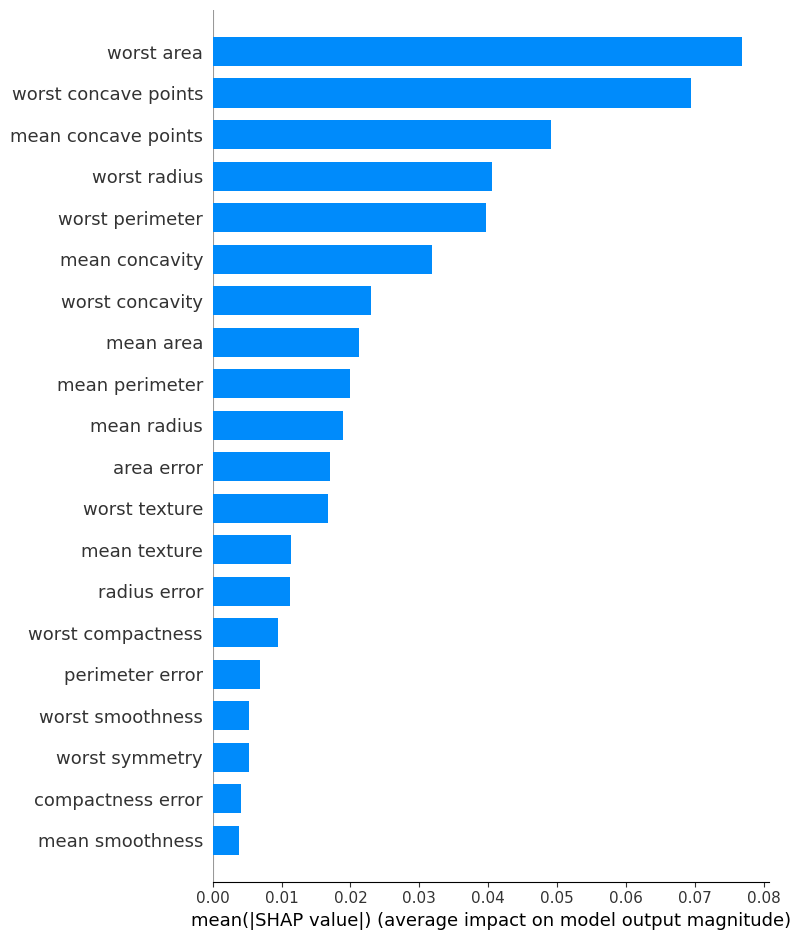

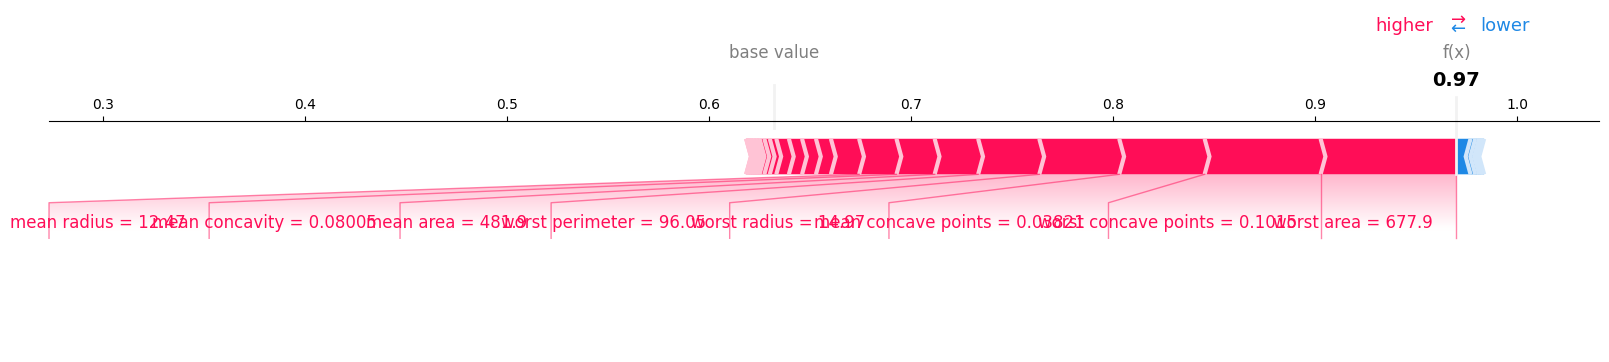

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

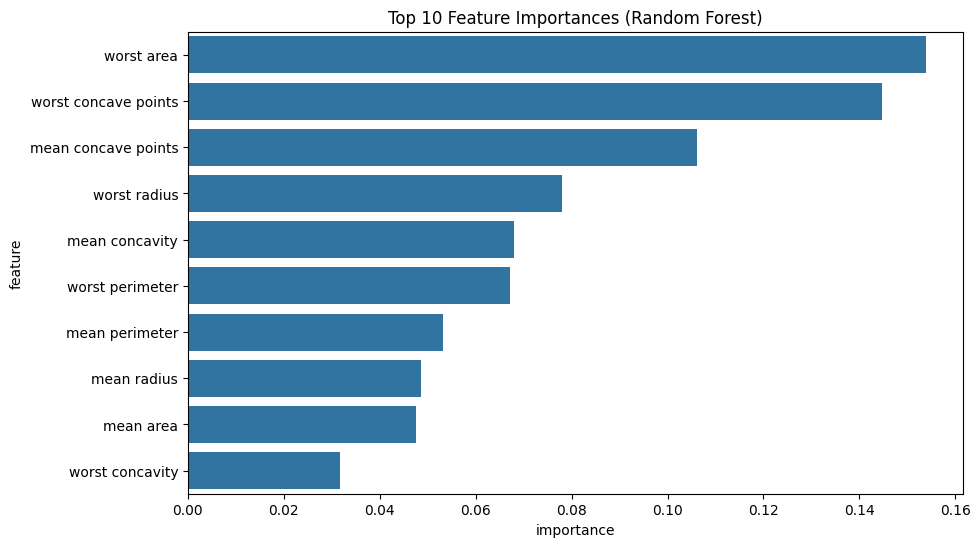

In [ ]:



# Explain prediction for a sample
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[sample_idx],
    predict_fn=model.predict_proba
)

# Display explanation
lime_exp.show_in_notebook(show_table=True)

# ---------------------------
# 📊 Visualize Feature Importances
# ---------------------------
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

**Declaration**

I, Vedant Bhagwat Puri, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/vedant018/Object-Detection-and-Multi-Object-Classification

Signature:  Vedant Bhagwat Puri

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion